In [1]:
import pandas as pd
import os
import json
from ibm_watson import DiscoveryV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from fpdf import FPDF
from ibm_watson import IAMTokenManager
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

In [2]:
#Chandrashekar Account
authenticator = IAMAuthenticator('At0ptC3w9HdmKG3CptH7qkKLU_ZARAyWZHbpaEAZnjNC')
discovery = DiscoveryV1(version='2019-04-30',authenticator=authenticator)
discovery.set_service_url('https://api.eu-gb.discovery.watson.cloud.ibm.com/instances/4b267e4e-f78c-4712-a837-da0619b42dd7')

In [3]:
#Vasul Account
authenticator = IAMAuthenticator('_qC40Fi-n7shPmZRm2VZPvGFn9iYsHs01cGD4UHMVuMi')
discovery = DiscoveryV1(version='2019-04-30',authenticator=authenticator)
discovery.set_service_url('https://api.eu-gb.discovery.watson.cloud.ibm.com/instances/20735531-1e42-4010-9da2-5bf46401f7ef')

In [4]:
try:
    new_collection = discovery.create_collection(
    environment_id='47a4c970-5d45-4372-9237-76955d224b11',
    configuration_id='7a5a7fef-4460-40e1-ad5a-d6c495ec01a1', 
    name='Test_CV', 
    description='This is a test collection').get_result()
except ApiException:
    print("Collection already exists")
test=json.dumps(new_collection)
test2=json.loads(test)

In [5]:
collection_id = test2['collection_id']

In [6]:
data=pd.read_csv('C:/Users/starl/Data/CV_Chandru.csv')

In [7]:
fileobject1 = open('response_keywords.json', 'r')
fileobject2 = open('response_cv.json', 'r')
data1 = json.load(open('response_cv.json'))
data2=json.load(open('response_keywords.json'))

In [8]:
with open(os.path.join(os.getcwd(), 'C:\\Users\\starl', 'data1.json')) as fileinfo:
    add_doc = discovery.add_document('47a4c970-5d45-4372-9237-76955d224b11', collection_id ,file=fileinfo).get_result()
print(json.dumps(add_doc, indent=2))

{
  "document_id": "dcf1f16f-37e3-49bd-a99c-e4ca0f7179f3",
  "status": "pending"
}


In [9]:
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
}

data = {
  'grant_type': 'urn:ibm:params:oauth:grant-type:apikey',
  'apikey': '_qC40Fi-n7shPmZRm2VZPvGFn9iYsHs01cGD4UHMVuMi'
}

response = requests.post('https://iam.cloud.ibm.com/identity/token', headers=headers, data=data)

In [10]:
test=response.json()['access_token']

In [11]:
headers = {
    'Authorization': 'Bearer '+ test,
}
print()
params = (
    ('version', '2018-12-03'),
    ('deduplicate', 'false'),
    ('highlight', 'true'),
    ('passages', 'true'),
    ('passages.count', '5'),
    ('query', 'enriched_text.concepts.relevance>0.639986'),
)

response = requests.get('https://api.eu-gb.discovery.watson.cloud.ibm.com/instances/20735531-1e42-4010-9da2-5bf46401f7ef/v1/environments/47a4c970-5d45-4372-9237-76955d224b11/collections/6e3b6ea8-3c31-42fc-95df-0e56401ace1c/query', headers = headers, params = params)


In [12]:
with open(os.path.join(os.getcwd(), 'C:\\Users\\starl', 'data2.json')) as fileinfo:
    add_doc = discovery.add_document('47a4c970-5d45-4372-9237-76955d224b11', collection_id ,file=fileinfo).get_result()
print(json.dumps(add_doc, indent=2))

{
  "document_id": "5cb05d74-7f6f-446a-84c2-cd0bf0e04e55",
  "status": "pending"
}


In [13]:
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
}

data = {
  'grant_type': 'urn:ibm:params:oauth:grant-type:apikey',
  'apikey': '_qC40Fi-n7shPmZRm2VZPvGFn9iYsHs01cGD4UHMVuMi'
}

response = requests.post('https://iam.cloud.ibm.com/identity/token', headers=headers, data=data)

In [14]:
headers = {
    'Authorization': 'Bearer '+ test,
}
print()
params = (
    ('version', '2018-12-03'),
    ('deduplicate', 'false'),
    ('highlight', 'true'),
    ('passages', 'true'),
    ('passages.count', '5'),
    ('query', 'matching_results::"1.0",results.enriched_text.entities.sentiment.score>=0.564584'),
)

response = requests.get('https://api.eu-gb.discovery.watson.cloud.ibm.com/instances/20735531-1e42-4010-9da2-5bf46401f7ef/v1/environments/47a4c970-5d45-4372-9237-76955d224b11/collections/a998317c-0f91-4c01-b8f8-a4f3d920dc17/query', headers=headers, params=params)


In [15]:
for key in data1.keys():
  if key == 'results':
    for key in data1['results']:
        print(key.pop('text'))

John McNamara IBM Master Inventor, Honorary Professor, Speaker and IBM UK University Programs Lead Winchester, England, United Kingdom John is an IBM Master Inventor, Honorary Professor, Research Fellow, Impact Fellow and currently leads IBM UK University Programs. John has a diverse background that includes consultancy, performance, service & product delivery, all underpinned by a passion for innovation. Most recently his work leading the Innovation Centre technologist team has allowed him to combine these interests in order to maximise the potential of new technology while solving real problems. John has overseen the delivery of many cognitive cloud-based solutions and understands how to combine technologies to quickly provide value and spur innovation. John is an active inventor with an invention portfolio spanning mobile, A.I, messaging, integration and predictive analytics.Introduction to John McNamara: http://bit.ly/JohnMcNamaraCognitive Projects: https://prezi.com/view/wyeG4wHvr

In [16]:
data1

{'matching_results': 1,
 'session_token': '1_10aFfMD7Br8yxdt3_sYX6QnmcQ',
 'passages': [],
 'results': [{'id': 'b7cf8f3d3132c5549348bc931b58ecf5',
   'result_metadata': {'confidence': 0.08408220853860772, 'score': 1},
   'extracted_metadata': {'sha1': 'cb5cb5d8dbb2ef487d5c2153b20106d92a11868e',
    'filename': 'test46.pdf',
    'file_type': 'pdf'},
   'enriched_text': {'sentiment': {'document': {'score': 0.849419,
      'label': 'positive'}},
    'entities': [{'count': 17,
      'sentiment': {'score': 0, 'label': 'neutral'},
      'text': 'Honorary Professor',
      'relevance': 0.878436,
      'type': 'JobTitle'},
     {'count': 19,
      'sentiment': {'score': 0, 'label': 'neutral'},
      'text': 'John McNamara',
      'relevance': 0.724523,
      'type': 'Person',
      'disambiguation': {'subtype': [],
       'name': 'John McNamara (fraudster)',
       'dbpedia_resource': 'http://dbpedia.org/resource/John_McNamara_(fraudster)'}},
     {'count': 30,
      'sentiment': {'score': 0, 

In [17]:
for key in data2.keys():
  if key == 'results':
    for key in data2['results']:
        print(key.pop('about'))

Introduction

As an Application Developer, you will lead IBM into the future by translating system requirements into the design and development of customized systems in an agile environment. The success of IBM is in your hands as you transform vital business needs into code and drive innovation. Your work will power IBM and its clients globally, collaborating and integrating code into enterprise systems. You will have access to the latest education, tools and technology, and a limitless career path with the worldâ€™s technology leader. Come to IBM and make a global impact!

Your Role and Responsibilities

You will work with various projects and clients, working towards client specifications. Your role will involve:

Development for specific systems on a range of platforms including Linux, Microsoft and various mobile environments
Working within the entire development life-cycle including design, build, and coding
Using object-oriented programming languages and tools to deliver a range 

In [18]:
data2

{'matching_results': 25,
 'session_token': '1_jXTy4GO9gx712YI3ijDYMjf43y',
 'results': [{'id': 'edba02854c29b21582400e7a9936e108_1',
   'result_metadata': {'confidence': 0, 'score': 1},
   'location': 'Hursley, England, United Kingdom',
   'enriched_about': {'keywords': [{'text': 'success of IBM',
      'relevance': 0.622394,
      'count': 1},
     {'text': 'various projects', 'relevance': 0.618575, 'count': 1},
     {'text': 'flexible working pattern', 'relevance': 0.594774, 'count': 1},
     {'text': 'Client Innovation Centre', 'relevance': 0.582785, 'count': 1},
     {'text': 'agile environment', 'relevance': 0.579993, 'count': 1},
     {'text': 'vital business', 'relevance': 0.568028, 'count': 1},
     {'text': 'current working environment',
      'relevance': 0.555644,
      'count': 1},
     {'text': 'IBM', 'relevance': 0.555277, 'count': 7},
     {'text': 'Application Developer', 'relevance': 0.553782, 'count': 1},
     {'text': 'valuable experience', 'relevance': 0.550015, 'co

In [19]:
response = discovery.query('47a4c970-5d45-4372-9237-76955d224b11',collection_id).get_result()
print(json.dumps(response, indent=2))

{
  "matching_results": 0,
  "session_token": "1_10aFfMD7Br8XCY73_cqS6f8WLa",
  "results": [],
  "retrieval_details": {
    "document_retrieval_strategy": "untrained"
  }
}


In [20]:
with open('response_final1.json') as json_file:
    data = json_file.read()

In [21]:
data= json.loads(data)
list = []

In [22]:
for i in data['results']:
    for j in i['results']:
        for k in j['enriched_text']['entities']:
            relevance={
                k['text'] : k['relevance']
            }
            list.append(k)
           ## for m in j['enriched_text']['entities']:
              ##  l.append(m)
            print(relevance)
#data['results'][0]['results'][0]['enriched_text']['entities'][0]['relevance']

{'Honorary Professor': 0.878436}
{'John McNamara': 0.724523}
{'IBM': 0.659415}
{'The University of Sheffield Ã¢â‚¬Â¢ Full-timeThe University of Sheffield': 0.642373}
{'Sheffield Hallam University': 0.631064}
{'Professor Sheffield Hallam University': 0.587617}
{'UK University': 0.566493}
{'Honorary Professor Sheffield': 0.530061}
{'University of Sheffield': 0.47771}
{'Honorary Professor UCLHonorary Professor UCLGLYPH': 0.44997}
{'United Kingdom': 0.440479}
{'Professor Sheffield Hallam': 0.408036}
{'England': 0.353947}
{'University College London': 0.336765}
{'UK University Programs': 0.309928}
{'University of SheffieldAdvanced': 0.294028}
{'Advanced Visiting Research Fellow': 0.27884}
{'Visiting Research Fellow': 0.272159}
{'Winchester': 0.254629}
{'United KingdomUnited Kingdom': 0.243999}
{'United KingdomUnited Kingdom': 0.233909}
{'England': 0.212034}
{'Professor': 0.207836}
{'Research FellowVisiting Research Fellow': 0.202748}
{'Innovation Centre technologist': 0.193718}
{'Research F

In [23]:
df = pd.DataFrame(list)
df.to_csv('plotting.csv')

In [24]:
data4 = pd.read_csv('plotting.csv')

In [25]:
data5 = data4.sort_values('relevance', ascending = True ).head(10)

<AxesSubplot:xlabel='relevance', ylabel='text'>

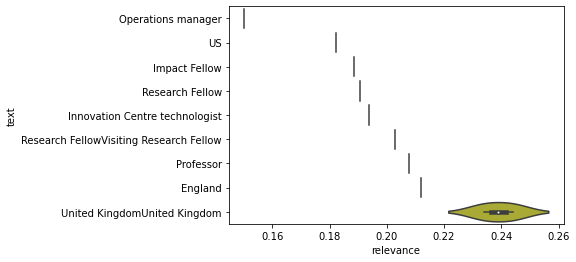

In [26]:
sns.violinplot(
    x=data5['relevance'],
    y=data5['text'],
    data6 = data5.nlargest(10,'relevance'))

In [27]:
data7 = data4.sort_values('relevance', ascending = False ).head(20)

<AxesSubplot:xlabel='relevance', ylabel='text'>

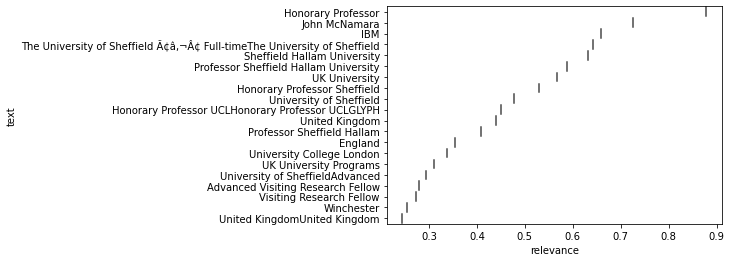

In [28]:
sns.violinplot(
    x=data7['relevance'],
    y=data7['text'],
    data8 = data7.nlargest(10,'relevance'))

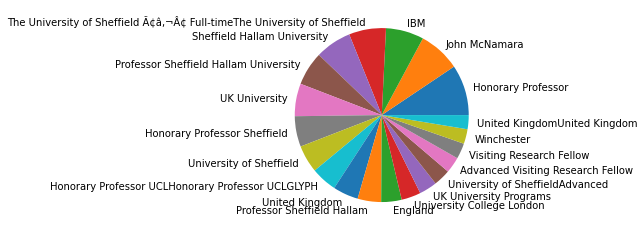

In [29]:
y = data7['relevance']
mylabels = data7['text']

plt.pie(y, labels = mylabels)
plt.show() 

In [30]:
delete_collection = discovery.delete_collection(
    '47a4c970-5d45-4372-9237-76955d224b11', 
    collection_id).get_result()
print(json.dumps(delete_collection, indent=2))

{
  "collection_id": "0445c61a-9328-4435-8115-c59364372608",
  "status": "deleted"
}
